In [777]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from scipy.ndimage import gaussian_filter1d
%matplotlib inline


<AxesSubplot:xlabel='TIME'>

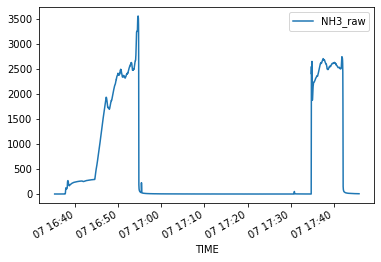

In [778]:
df = pd.read_excel('Multi_sensor_ammonia_readings.xlsx')
df['TIME'] = [datetime.datetime.combine(datetime.date.today(), t) for t in df['TIME']]
df = df.loc[4345:]
df.plot(x='TIME', y='NH3_raw', style='-')

In [779]:
dat = pd.read_excel('MSD.xlsx')
dat.columns

Index(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Unnamed: 4'], dtype='object')

In [780]:
dat  = dat[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
dat.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
0,78246,145057,117962,77859
1,78246,144492,117500,77859
2,78246,144492,117962,77859
3,77940,144492,117962,77859
4,78554,144492,117962,77859


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

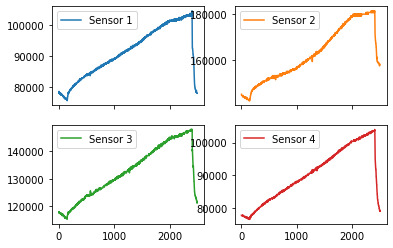

In [781]:
dat = dat.loc[0:2500]
dat.plot(subplots=True, layout=(2,2))

In [782]:
type(df['TIME'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [783]:
Time = []
for x in range(len(dat['Sensor 1'])):
    Time.append(df['TIME'].iloc[0] +  datetime.timedelta(0,x))
dat['TIME'] = Time

In [784]:
dat['Sensor 1'] = gaussian_filter1d(dat['Sensor 1'], 7)
dat['Sensor 2'] = gaussian_filter1d(dat['Sensor 2'], 7)
dat['Sensor 3'] = gaussian_filter1d(dat['Sensor 3'], 7)
dat['Sensor 4'] = gaussian_filter1d(dat['Sensor 4'], 7)
#d1.plot(subplots=True, layout=(2,2))

In [785]:
df = df[ df['TIME'] > dat['TIME'].iloc[0]]
df = df[ df['TIME'] < dat['TIME'].iloc[-1]]

<ipython-input-786-f722de71ad63>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-786-f722de71ad63>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-786-f722de71ad63>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax32.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-786-f722de71ad63>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax42.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-786-f722de71ad63>:57: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


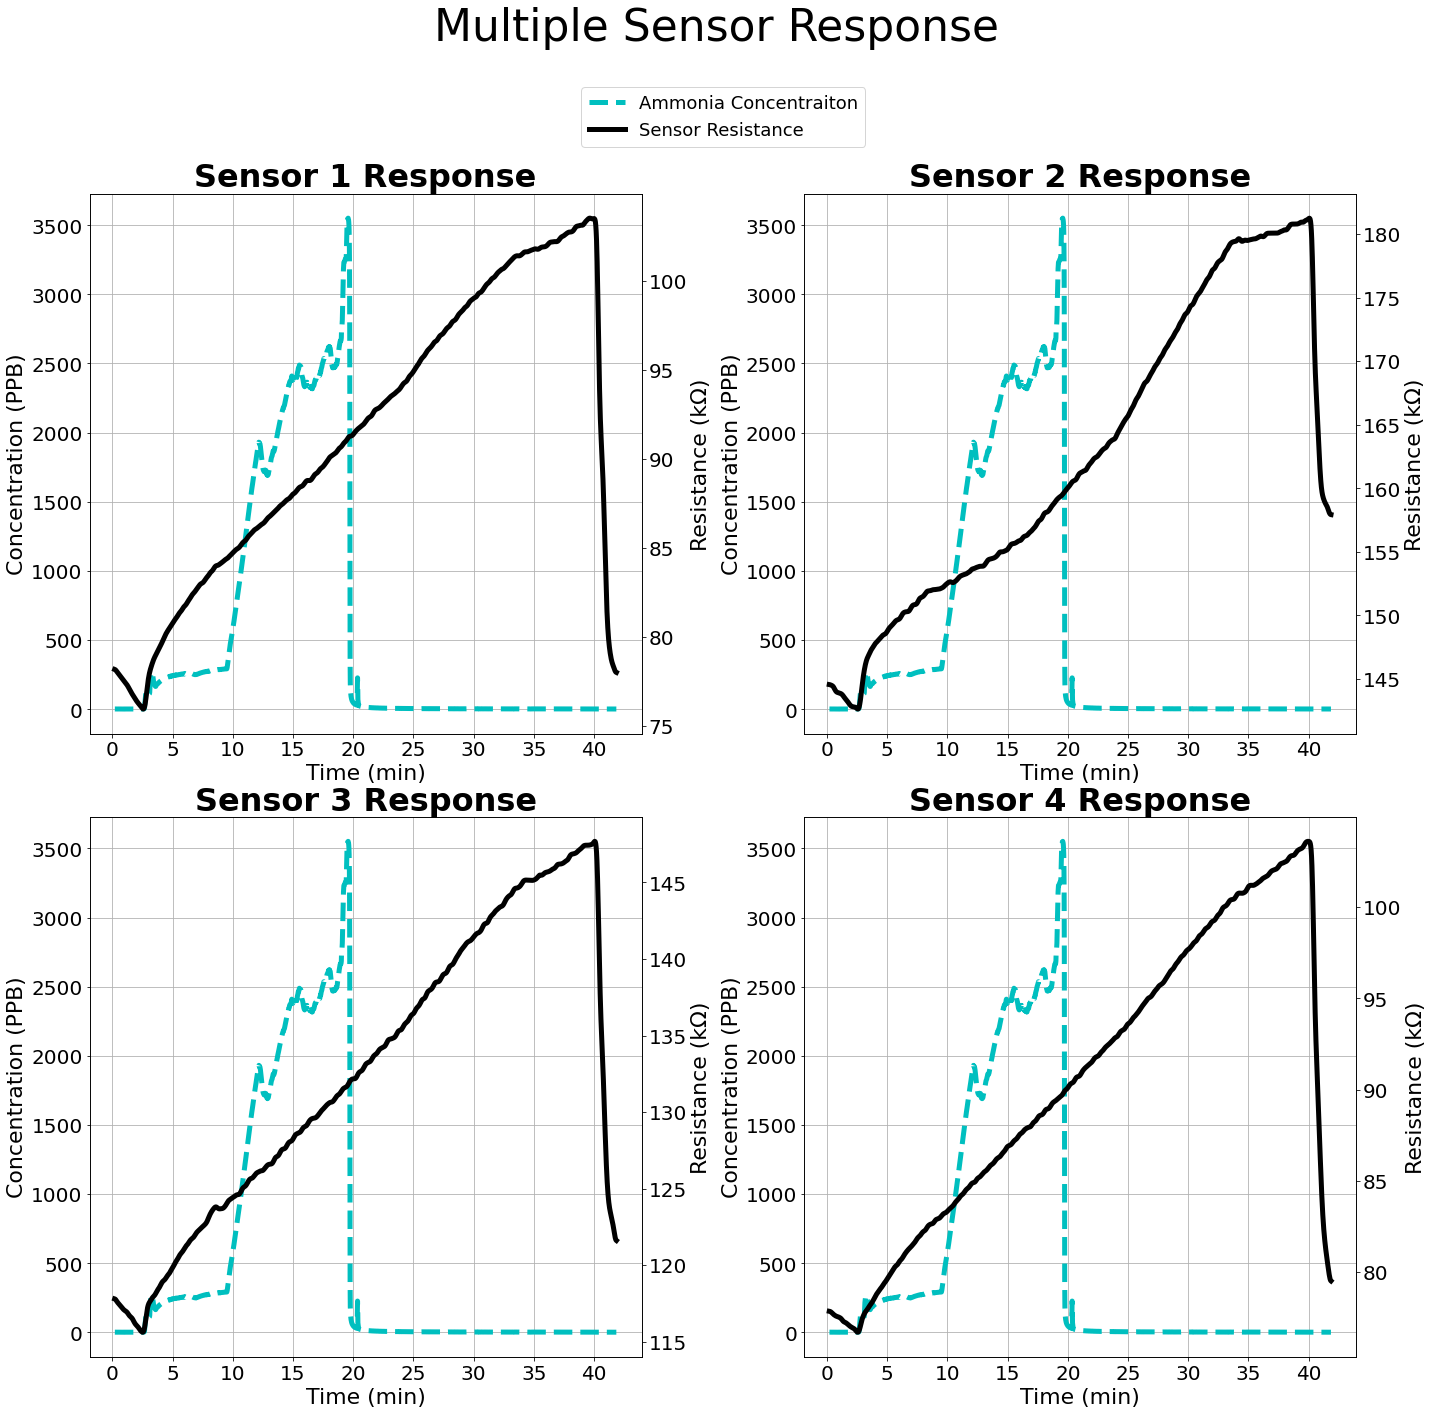

In [786]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20),constrained_layout=True)


ax12 = ax1.twinx()
ax1.grid()
ax1.plot(df['TIME'],df['NH3_raw'],'--c', label = 'Ammonia Concentraiton', linewidth = 5) #Piccaro
ax12.plot(dat['TIME'] ,dat['Sensor 1']/1000,'-k',label = 'Sensor Resistance', linewidth = 5)#Sensor
ax1.set_title('Sensor 1 Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 22)
ax12.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax12.tick_params( labelsize=20)
ax1.set_xlabel('Time (min)',fontsize = 22)
ax12.set_xticklabels([0,5,10,15,20,25,30,35,40])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax22 = ax2.twinx()
ax2.grid()
ax2.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax22.plot(dat['TIME'] ,dat['Sensor 2']/1000,'-k', linewidth = 5)#Sensor
ax2.set_title('Sensor 2 Response', fontsize = 32, fontweight ='bold')
ax2.set_ylabel('Concentration (PPB)',fontsize = 22)
ax22.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax2.tick_params( labelsize=20)
ax22.tick_params( labelsize=20)
ax2.set_xlabel('Time (min)',fontsize = 22)
ax22.set_xticklabels([0,5,10,15,20,25,30,35,40])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax32 = ax3.twinx()
ax3.grid()
ax3.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax32.plot(dat['TIME'] ,dat['Sensor 3']/1000,'-k', linewidth = 5)#Sensor
ax3.set_title('Sensor 3 Response', fontsize = 32, fontweight ='bold')
ax3.set_ylabel('Concentration (PPB)',fontsize = 22)
ax32.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax3.tick_params( labelsize=20)
ax32.tick_params( labelsize=20)
ax3.set_xlabel('Time (min)',fontsize = 22)
ax32.set_xticklabels([0,5,10,15,20,25,30,35,40])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)

ax42 = ax4.twinx()
ax4.grid()
ax4.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax42.plot(dat['TIME'] ,dat['Sensor 4']/1000,'-k', linewidth = 5)#Sensor
ax4.set_title('Sensor 4 Response', fontsize = 32, fontweight ='bold')
ax4.set_ylabel('Concentration (PPB)',fontsize = 22)
ax42.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax4.tick_params( labelsize=20)
ax42.tick_params( labelsize=20)
ax4.set_xlabel('Time (min)',fontsize = 22)
ax42.set_xticklabels([0,5,10,15,20,25,30,35,40])
fig.suptitle("Multiple Sensor Response", fontsize = 44)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.legend(loc='upper left', bbox_to_anchor=(.4, .93), fontsize = 18)

In [787]:
dat = dat.loc[0:550]
df = df[ df['TIME'] > dat['TIME'].iloc[0]]
df = df[ df['TIME'] < dat['TIME'].iloc[-1]]

<ipython-input-788-edfd6361a424>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-788-edfd6361a424>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-788-edfd6361a424>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax32.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-788-edfd6361a424>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax42.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-788-edfd6361a424>:57: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


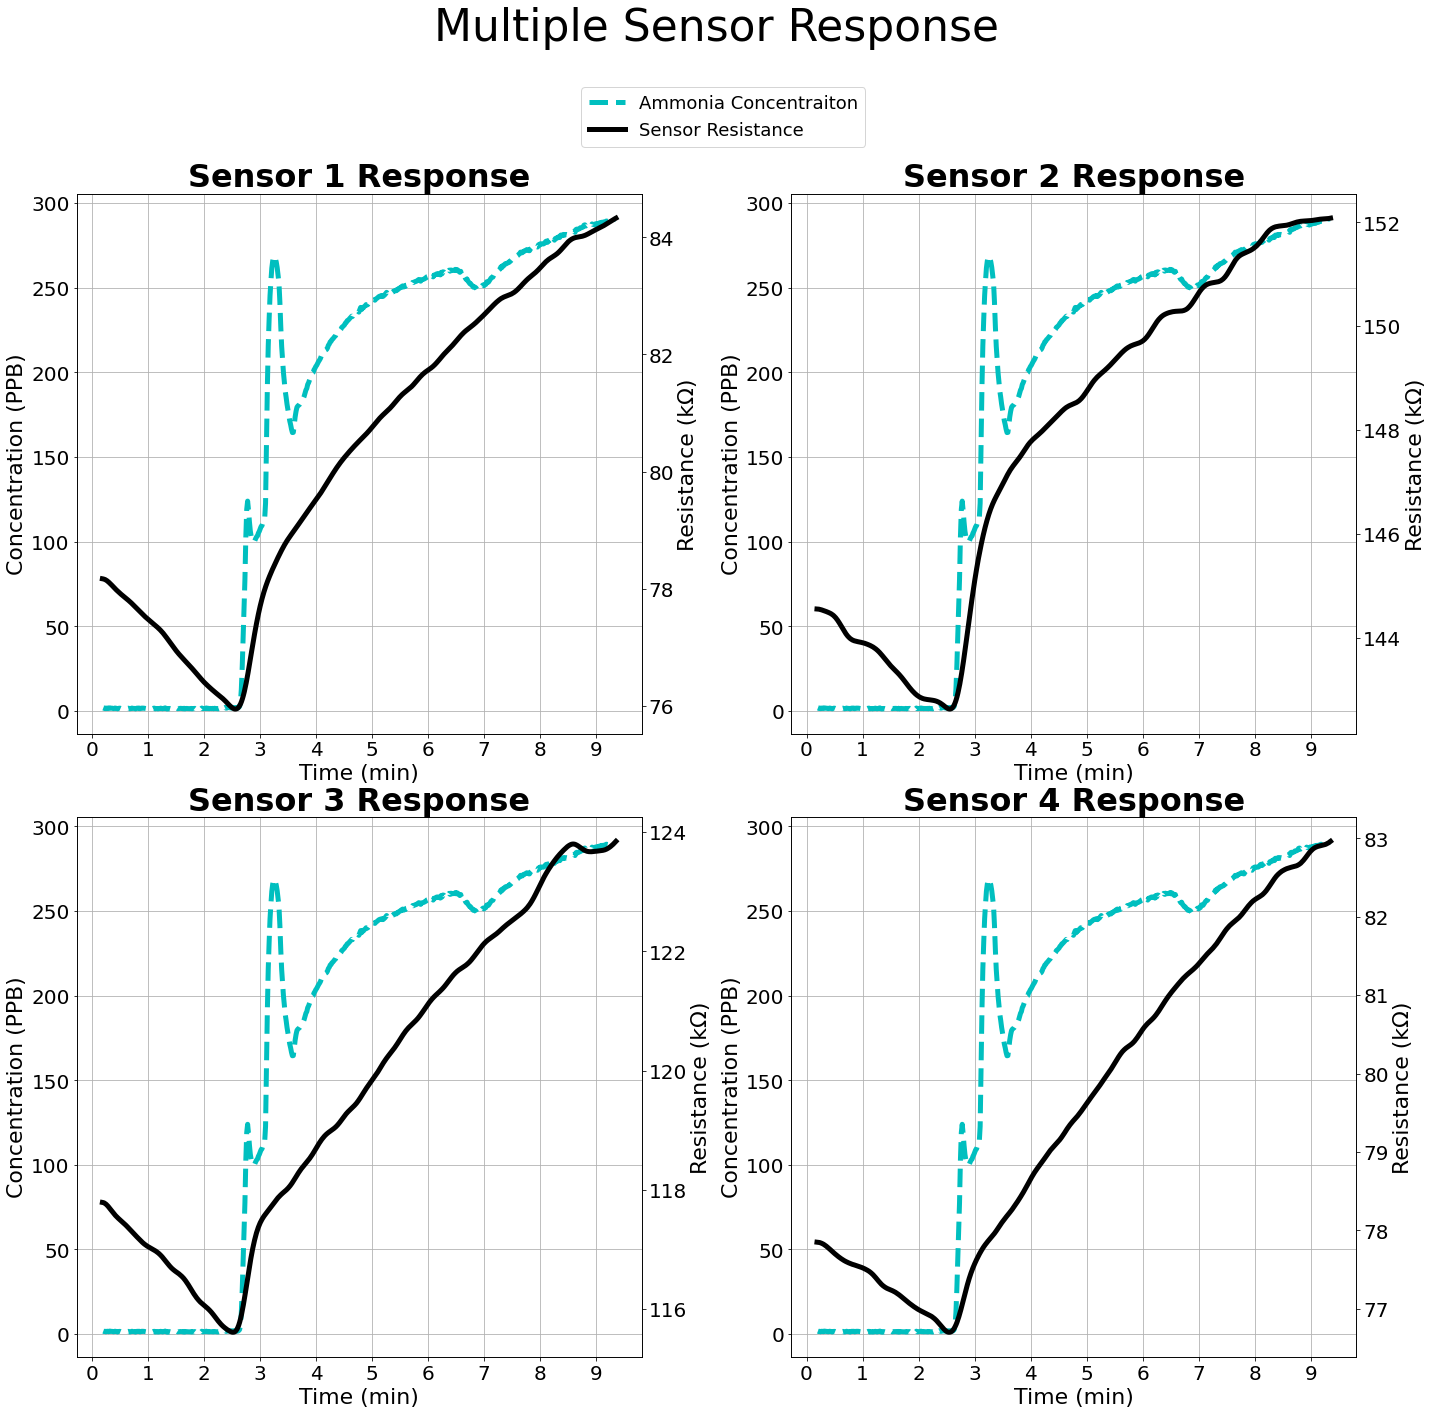

In [788]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20), constrained_layout=True)


ax12 = ax1.twinx()
ax1.grid()
ax1.plot(df['TIME'],df['NH3_raw'],'--c', label = 'Ammonia Concentraiton', linewidth = 5) #Piccaro
ax12.plot(dat['TIME'] ,dat['Sensor 1']/1000,'-k',label = 'Sensor Resistance', linewidth = 5)#Sensor
ax1.set_title('Sensor 1 Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 22)
ax12.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax12.tick_params( labelsize=20)
ax1.set_xlabel('Time (min)',fontsize = 22)
ax12.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax22 = ax2.twinx()
ax2.grid()
ax2.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax22.plot(dat['TIME'] ,dat['Sensor 2']/1000,'-k', linewidth = 5)#Sensor
ax2.set_title('Sensor 2 Response', fontsize = 32, fontweight ='bold')
ax2.set_ylabel('Concentration (PPB)',fontsize = 22)
ax22.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax2.tick_params( labelsize=20)
ax22.tick_params( labelsize=20)
ax2.set_xlabel('Time (min)',fontsize = 22)
ax22.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax32 = ax3.twinx()
ax3.grid()
ax3.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax32.plot(dat['TIME'] ,dat['Sensor 3']/1000,'-k', linewidth = 5)#Sensor
ax3.set_title('Sensor 3 Response', fontsize = 32, fontweight ='bold')
ax3.set_ylabel('Concentration (PPB)',fontsize = 22)
ax32.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax3.tick_params( labelsize=20)
ax32.tick_params( labelsize=20)
ax3.set_xlabel('Time (min)',fontsize = 22)
ax32.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)

ax42 = ax4.twinx()
ax4.grid()
ax4.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax42.plot(dat['TIME'] ,dat['Sensor 4']/1000,'-k', linewidth = 5)#Sensor
ax4.set_title('Sensor 4 Response', fontsize = 32, fontweight ='bold')
ax4.set_ylabel('Concentration (PPB)',fontsize = 22)
ax42.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax4.tick_params( labelsize=20)
ax42.tick_params( labelsize=20)
ax4.set_xlabel('Time (min)',fontsize = 22)
ax42.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
fig.suptitle("Multiple Sensor Response", fontsize = 44)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.legend(loc='upper left', bbox_to_anchor=(.4, .93), fontsize = 18)